# Econometric UNFCCC Green Cities Commitment Analysis: USA
## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
df_all = pd.read_csv('allcities.csv')
df_unfccc = pd.read_csv('UNFCCC.csv')

In [3]:
plt.rcParams['font.family'] = 'Times New Roman'

### Distribution Plots

#### 1. Distribution of Cities signed up to UNFCCC

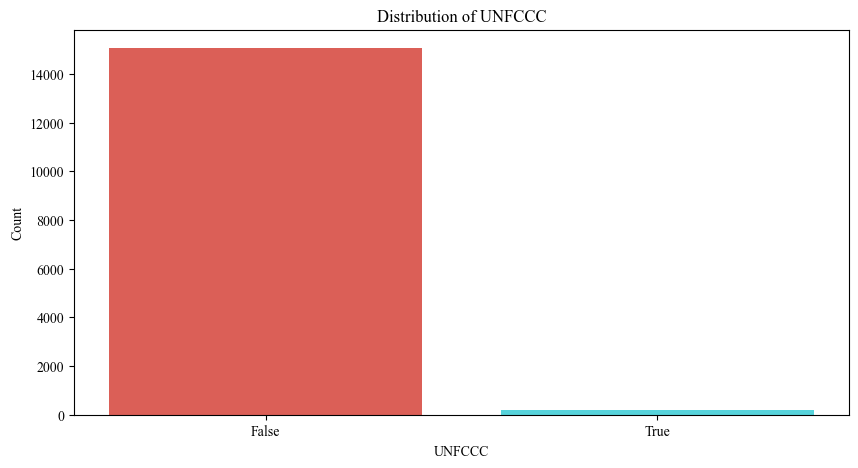

In [4]:
counts = df_all['UNFCCC'].value_counts()
plt.figure(figsize = (10,5))
plt.bar(counts.index.astype(str), counts.values, color = sns.color_palette('hls', 2))
plt.title('Distribution of UNFCCC')
plt.xlabel('UNFCCC')
plt.ylabel('Count')

plt.savefig('Plots/dist_plot_UNFCCC.png', bbox_inches='tight', dpi = 600)

plt.show()

#### 2. Distribution of Cities with Climate Commitments and Actions Undertaken

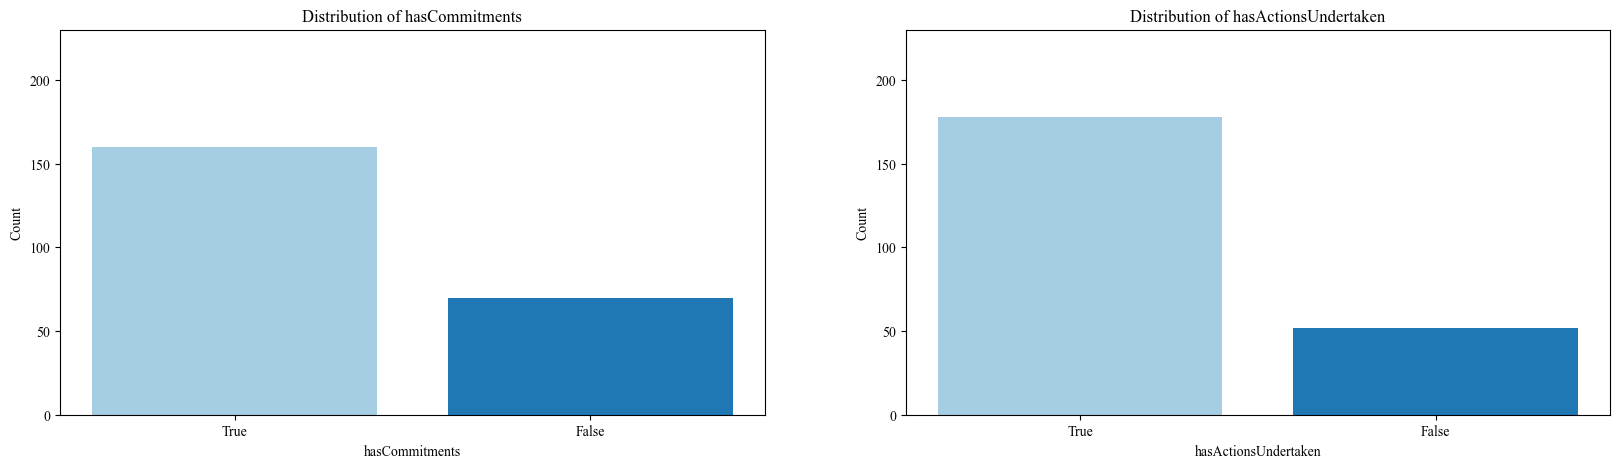

In [5]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
counts = df_unfccc['hasCommitments'].value_counts()
plt.bar(counts.index.astype(str), counts.values, color = sns.color_palette('Paired', 2))
plt.title('Distribution of hasCommitments')
plt.xlabel('hasCommitments')
plt.ylabel('Count')
plt.ylim(top = len(df_unfccc))

plt.subplot(1,2,2)
counts = df_unfccc['hasActionsUndertaken'].value_counts()
plt.bar(counts.index.astype(str), counts.values, color = sns.color_palette('Paired', 2))
plt.title('Distribution of hasActionsUndertaken')
plt.xlabel('hasActionsUndertaken')
plt.ylabel('Count')
plt.ylim(top = len(df_unfccc))

plt.savefig('Plots/dist_plot_Comm_Act.png', bbox_inches='tight', dpi = 600)

plt.show()

#### 3. Distribution of other UNFCCC variables

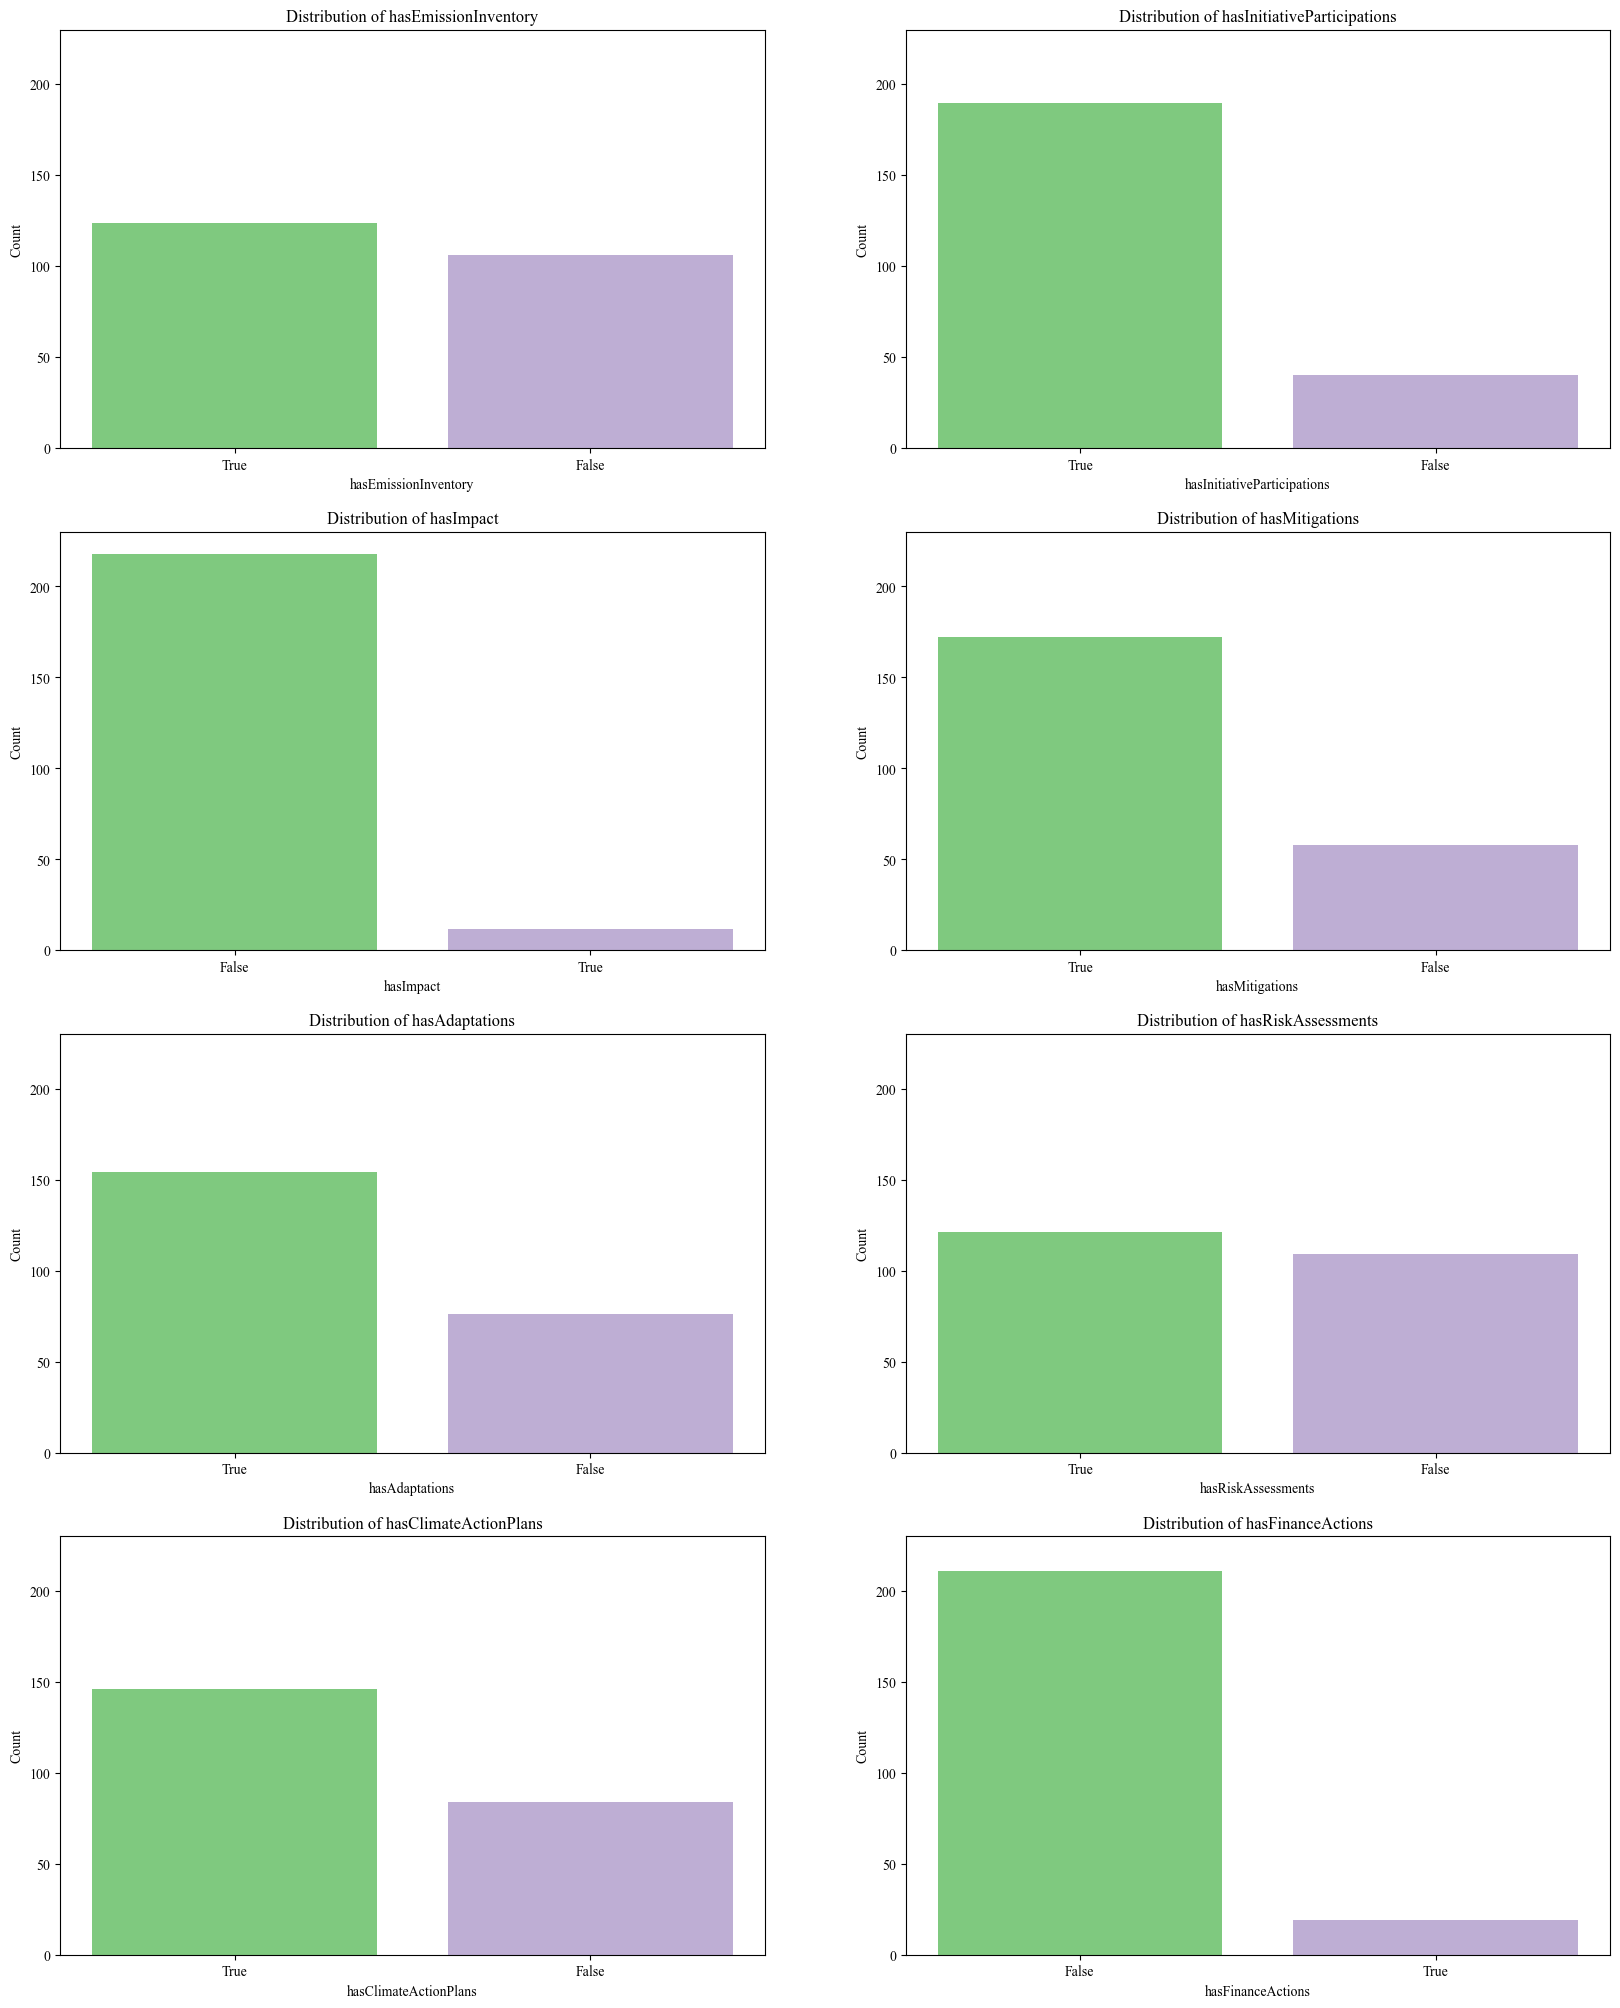

In [6]:
vars = ['hasEmissionInventory','hasInitiativeParticipations','hasImpact','hasMitigations','hasAdaptations','hasRiskAssessments','hasClimateActionPlans', 'hasFinanceActions']
i = 1
plt.figure(figsize = (20,25))
for var in vars:
    plt.subplot(4,2,i)
    counts = df_unfccc[var].value_counts()
    plt.bar(counts.index.astype(str), counts.values, color = sns.color_palette('Accent', 2))
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.ylim(top = len(df_unfccc))
    i += 1


plt.savefig('Plots/dist_plot_other.png', bbox_inches='tight', dpi = 600)

plt.show()

### Choropleth Plots

In [7]:
us_states = gpd.read_file('ShapeFiles/cb_2018_us_state_20m.shp')  # US States geo-shape file

##### 1. 2020 Election Results

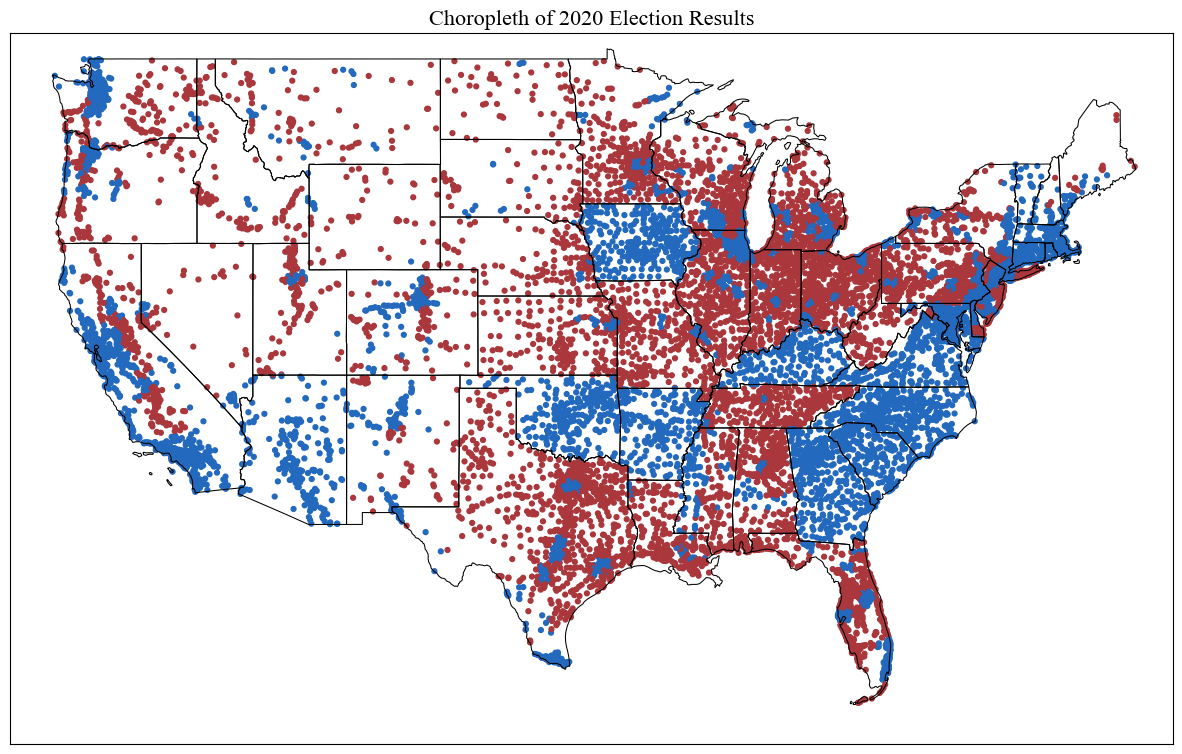

In [8]:
plt.figure(figsize = (15,10))
plt.ylim((23,50))
plt.xlim((-127,-65))
cmap = sns.color_palette('vlag', as_cmap = True)
plt.scatter(df_all['longitude'], df_all['latitude'], c = df_all['redCounty'], cmap = cmap, s = 12)
us_states.boundary.plot(ax=plt.gca(), linewidth = 0.75, color = 'black')
plt.title('Choropleth of 2020 Election Results', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel('')
plt.ylabel('')

plt.savefig('Plots/choro_elect_county.png', bbox_inches='tight', dpi = 600)

plt.show()

##### 2. Cities Signed up to UNFCCC

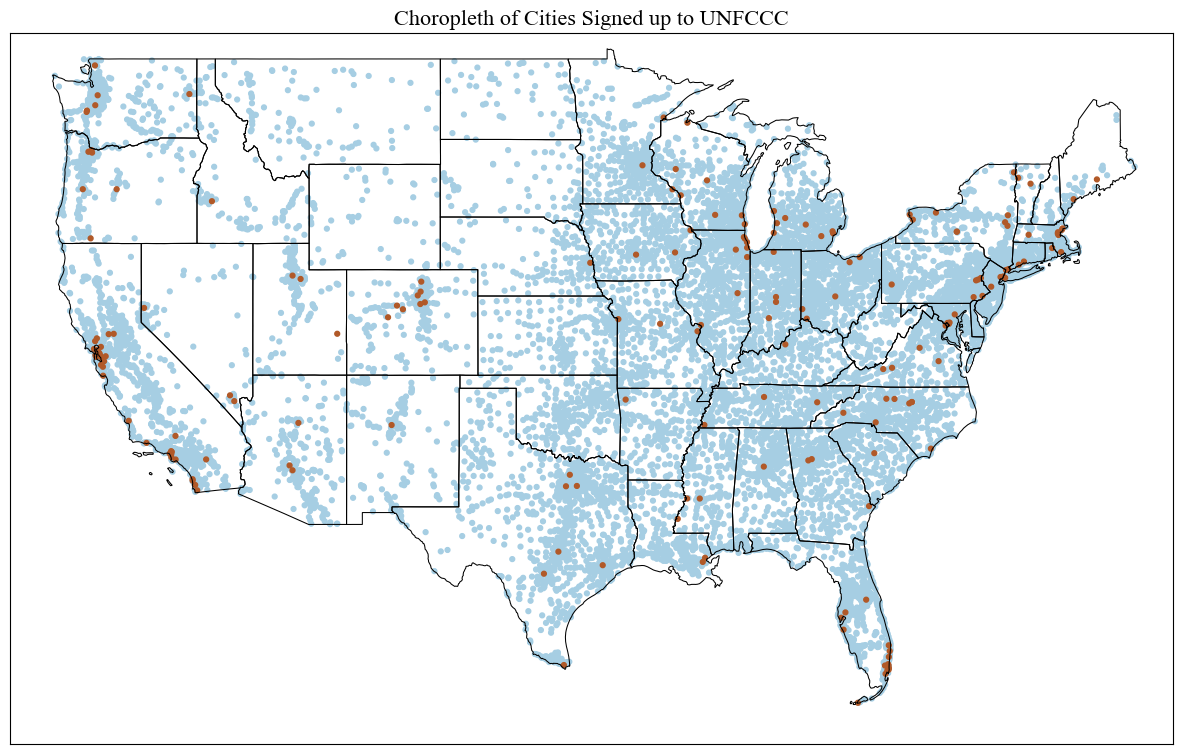

In [9]:
plt.figure(figsize = (15,10))
plt.ylim((23,50))
plt.xlim((-127,-65))
cmap = sns.color_palette('Paired', as_cmap = True)
us_states.boundary.plot(ax=plt.gca(), linewidth = 0.75, color = 'black')
plt.scatter(df_all.sort_values(by = 'UNFCCC', ascending = True)['longitude'], df_all.sort_values(by = 'UNFCCC', ascending = True)['latitude'], c = df_all.sort_values(by = 'UNFCCC', ascending = True)['UNFCCC'], cmap = cmap, s = 12)
plt.title('Choropleth of Cities Signed up to UNFCCC', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel('')
plt.ylabel('')

plt.savefig('Plots/choro_UNFCCC.png', bbox_inches='tight', dpi = 600)

plt.show()

##### 3. Climate Commitments

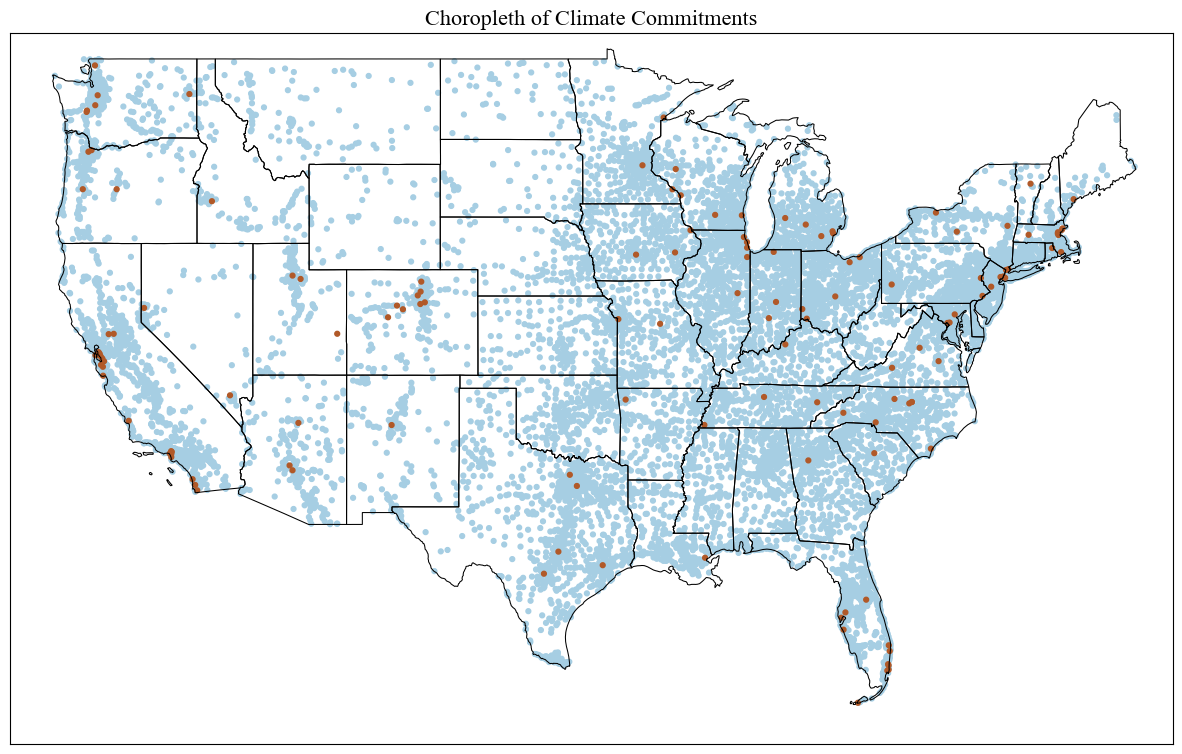

In [10]:
plt.figure(figsize = (15,10))
plt.ylim((23,50))
plt.xlim((-127,-65))
cmap = sns.color_palette('Paired', as_cmap = True)
plt.scatter(df_all.sort_values(by = 'hasCommitments', ascending = True)['longitude'], df_all.sort_values(by = 'hasCommitments', ascending = True)['latitude'], c = df_all.sort_values(by = 'hasCommitments', ascending = True)['hasCommitments'], cmap = cmap, s = 12)
us_states.boundary.plot(ax=plt.gca(), linewidth = 0.75, color = 'black')
plt.title('Choropleth of Climate Commitments', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel('')
plt.ylabel('')

plt.savefig('Plots/choro_commit.png', bbox_inches='tight', dpi = 600)

plt.show()

##### 4. Climate Actions Undertaken

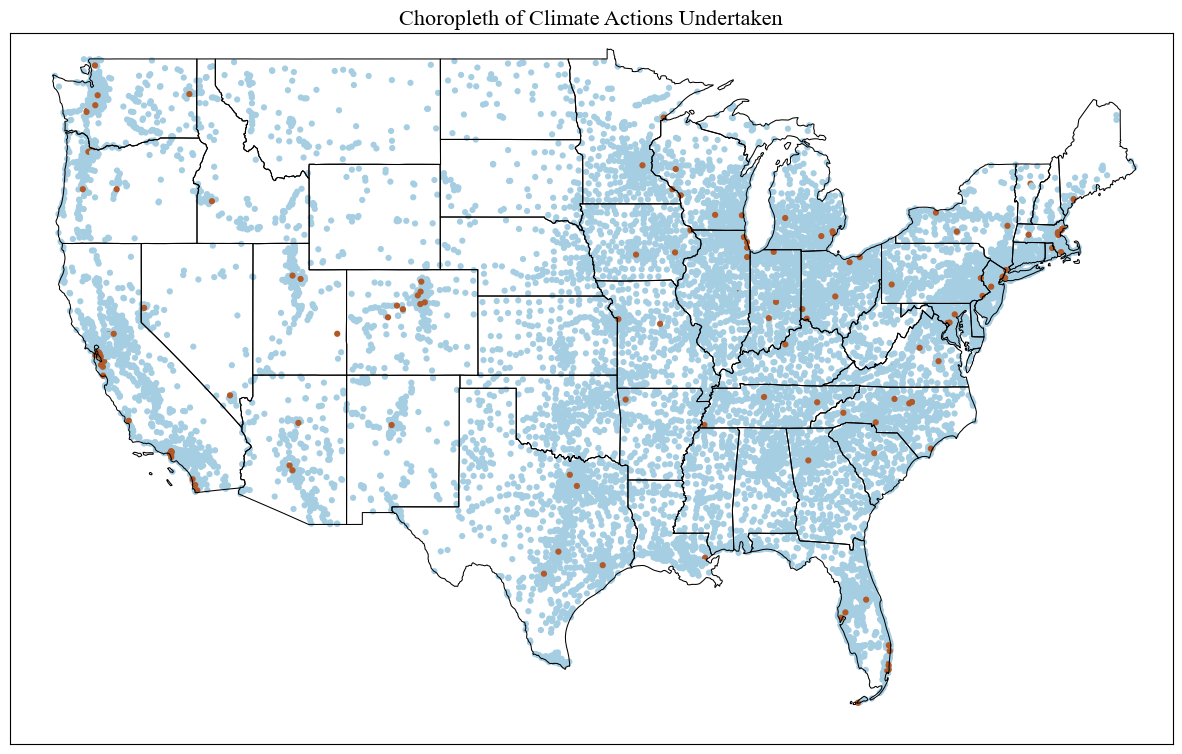

In [11]:
plt.figure(figsize = (15,10))
plt.ylim((23,50))
plt.xlim((-127,-65))
cmap = sns.color_palette('Paired', as_cmap = True)
plt.scatter(df_all.sort_values(by = 'hasActionsUndertaken', ascending = True)['longitude'], df_all.sort_values(by = 'hasActionsUndertaken', ascending = True)['latitude'], c = df_all.sort_values(by = 'hasActionsUndertaken', ascending = True)['hasCommitments'], cmap = cmap, s = 12)
us_states.boundary.plot(ax=plt.gca(), linewidth = 0.75, color = 'black')
plt.title('Choropleth of Climate Actions Undertaken', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel('')
plt.ylabel('')

plt.savefig('Plots/choro_actions.png', bbox_inches='tight', dpi = 600)

plt.show()

##### 5. Proportion of Population in Poverty

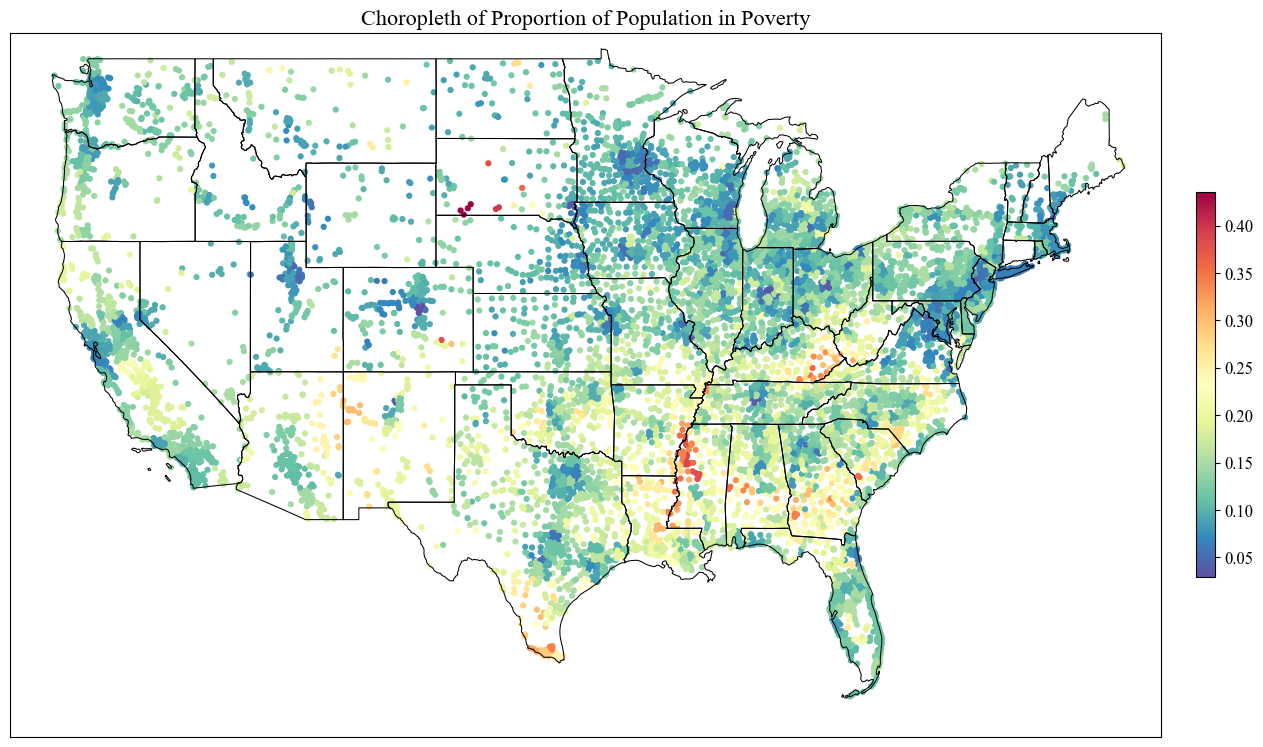

In [12]:
plt.figure(figsize = (18,10))
plt.ylim((23,50))
plt.xlim((-127,-65))
cmap = sns.color_palette('Spectral_r', as_cmap = True)
us_states.boundary.plot(ax=plt.gca(), linewidth = 0.75, color = 'black')
plt.scatter(df_all['longitude'], df_all['latitude'], c = df_all['povertyProp'], cmap = cmap, s = 12)
cbar = plt.colorbar(shrink = 0.5, pad = 0.025)
cbar.ax.tick_params(labelsize = 12)
plt.title('Choropleth of Proportion of Population in Poverty', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel('')
plt.ylabel('')

plt.savefig('Plots/choro_poverty.png', bbox_inches='tight', dpi = 600)

plt.show()

##### 6. Number of Natural Disasters since 1953

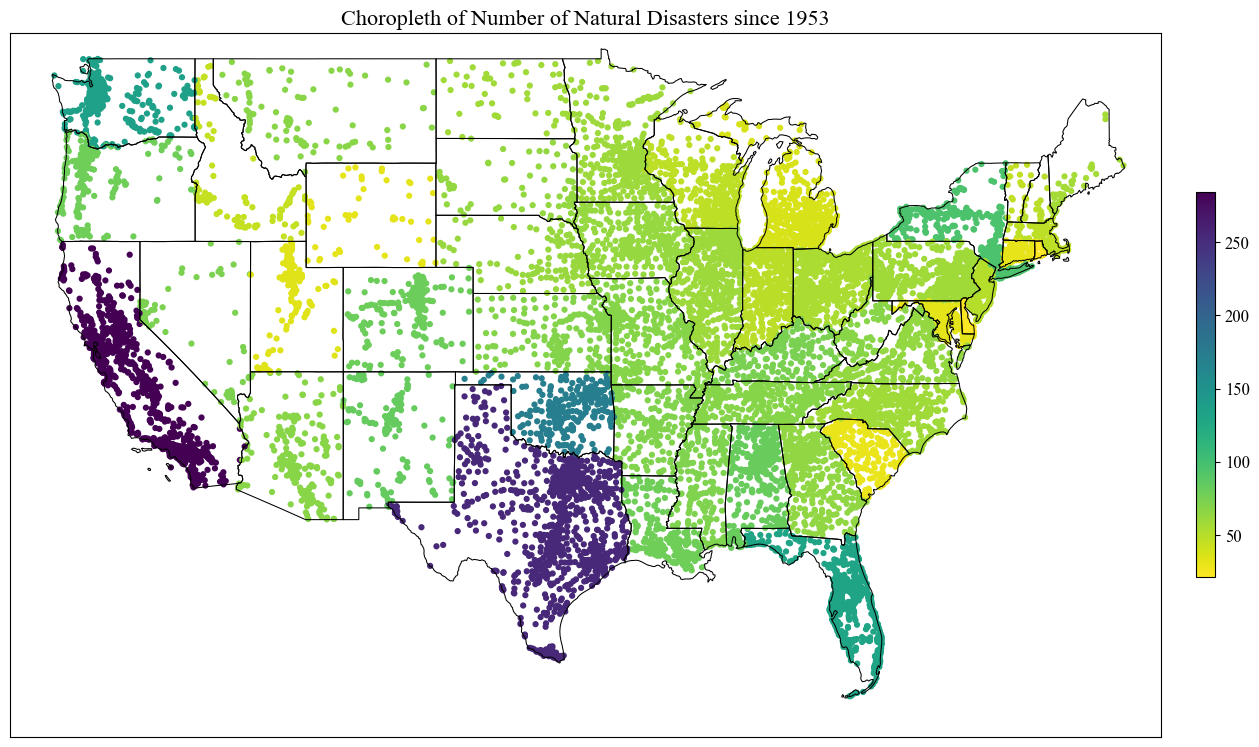

In [13]:
plt.figure(figsize = (18,10))
plt.ylim((23,50))
plt.xlim((-127,-65))
cmap = sns.color_palette('viridis_r', as_cmap = True)
plt.scatter(df_all['longitude'], df_all['latitude'], c = df_all['numDisasters'], cmap = cmap, s = 12)
us_states.boundary.plot(ax=plt.gca(), linewidth = 0.75, color = 'black')
cbar = plt.colorbar(shrink = 0.5, pad = 0.025)
cbar.ax.tick_params(labelsize = 12)
plt.title('Choropleth of Number of Natural Disasters since 1953', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel('')
plt.ylabel('')

plt.savefig('Plots/choro_nat_disasters.png', bbox_inches='tight', dpi = 600)

plt.show()

##### 7. Emissions Per Capita

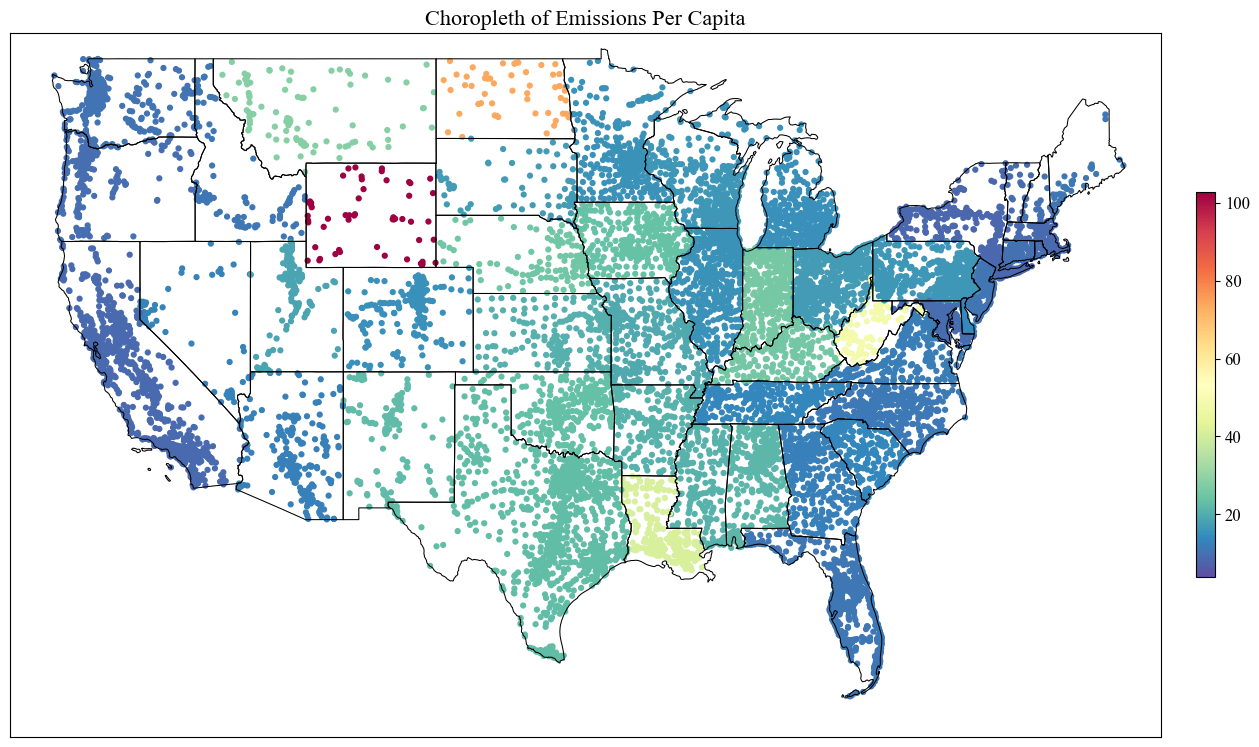

In [14]:
plt.figure(figsize = (18,10))
plt.ylim((23,50))
plt.xlim((-127,-65))
cmap = sns.color_palette('Spectral_r', as_cmap = True)
plt.scatter(df_all['longitude'], df_all['latitude'], c = df_all['avgEmissionsPerCapita'], cmap = cmap, s = 12)
us_states.boundary.plot(ax=plt.gca(), linewidth = 0.75, color = 'black')
cbar = plt.colorbar(shrink = 0.5, pad = 0.025)
cbar.ax.tick_params(labelsize = 12)
plt.title('Choropleth of Emissions Per Capita', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel('')
plt.ylabel('')

plt.savefig('Plots/choro_emissions.png', bbox_inches='tight', dpi = 600)

plt.show()

##### 8. Temperature Range Difference between 1940-1960 and 2000-2013

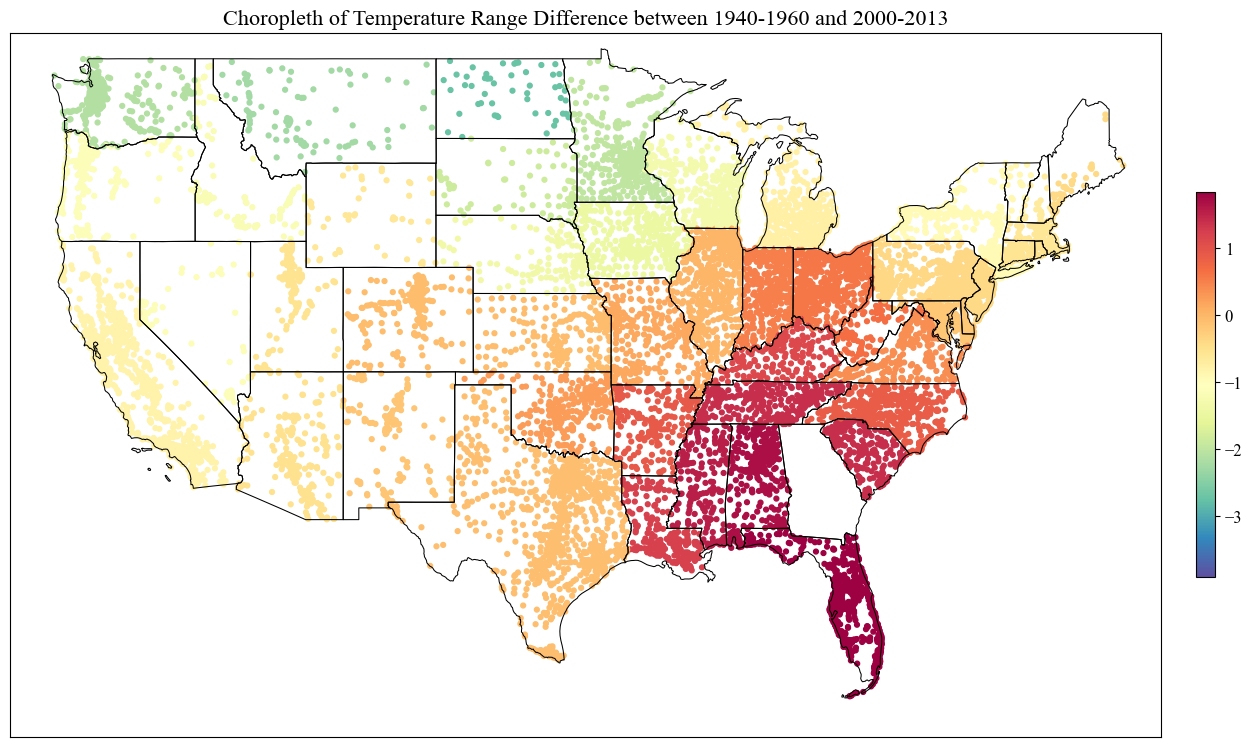

In [15]:
plt.figure(figsize = (18,10))
plt.ylim((23,50))
plt.xlim((-127,-65))
cmap = sns.color_palette('Spectral_r', as_cmap = True)
plt.scatter(df_all['longitude'], df_all['latitude'], c = df_all['tempDiff'], cmap = cmap, s = 12)
us_states.boundary.plot(ax=plt.gca(), linewidth = 0.75, color = 'black')
cbar = plt.colorbar(shrink = 0.5, pad = 0.025)
cbar.ax.tick_params(labelsize = 12)
plt.title('Choropleth of Temperature Range Difference between 1940-1960 and 2000-2013', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel('')
plt.ylabel('')

plt.savefig('Plots/choro_temp_diff.png', bbox_inches='tight', dpi = 600)

plt.show()

##### 9. Proportion of Population with less than a High School Diploma

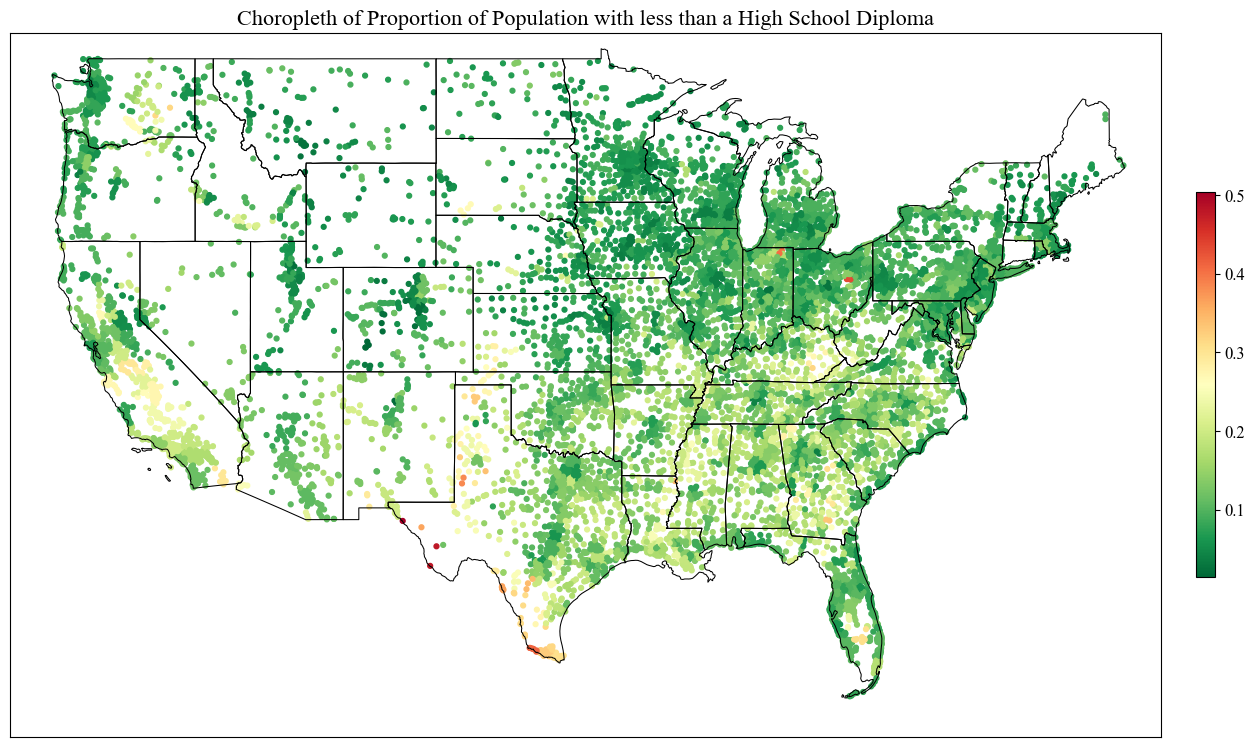

In [16]:
plt.figure(figsize = (18,10))
plt.ylim((23,50))
plt.xlim((-127,-65))
cmap = sns.color_palette('RdYlGn_r', as_cmap = True)
plt.scatter(df_all['longitude'], df_all['latitude'], c = df_all['lessThanHighSchoolProp'], cmap = cmap, s = 12)
us_states.boundary.plot(ax=plt.gca(), linewidth = 0.75, color = 'black')
cbar = plt.colorbar(shrink = 0.5, pad = 0.025)
cbar.ax.tick_params(labelsize = 12)
plt.title('Choropleth of Proportion of Population with less than a High School Diploma', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel('')
plt.ylabel('')

plt.savefig('Plots/choro_education.png', bbox_inches='tight', dpi = 600)

plt.show()

##### 10. Unemployment Rate by County

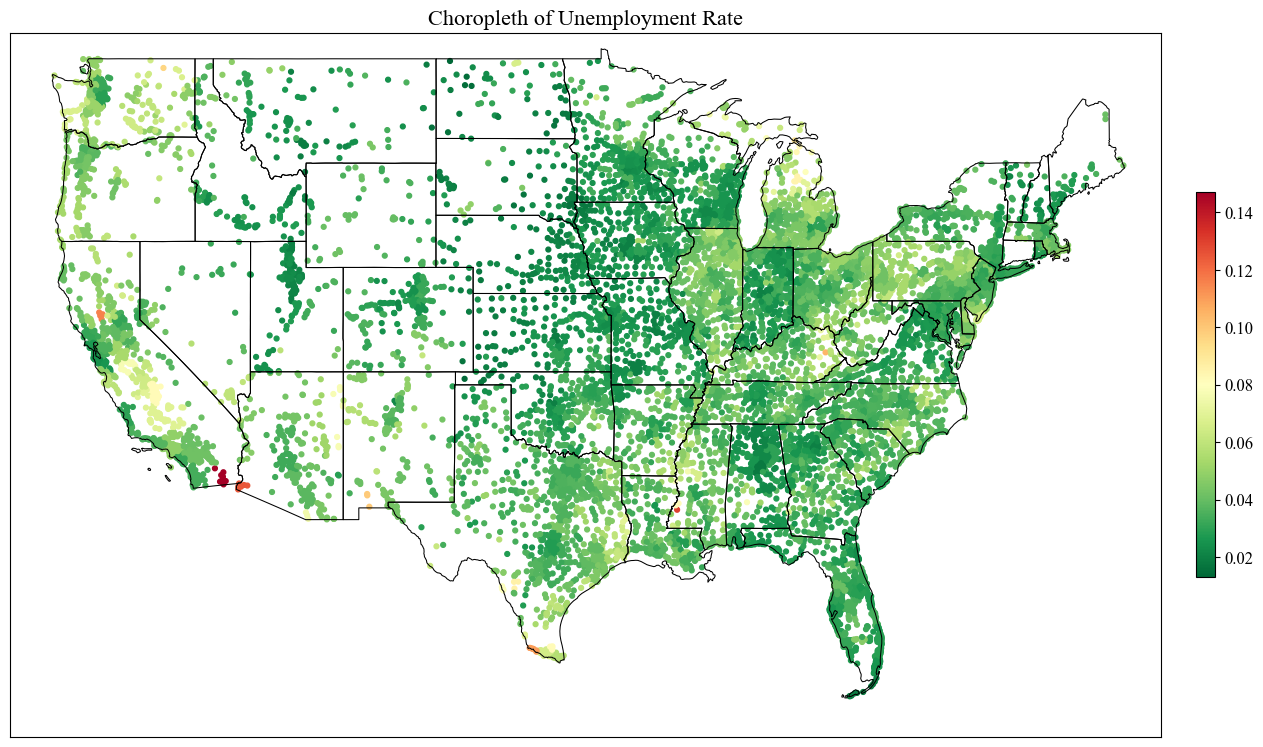

In [17]:
plt.figure(figsize = (18,10))
plt.ylim((23,50))
plt.xlim((-127,-65))
cmap = sns.color_palette('RdYlGn_r', as_cmap = True)
plt.scatter(df_all['longitude'], df_all['latitude'], c = df_all['unemploymentRate'], cmap = cmap, s = 12)
us_states.boundary.plot(ax=plt.gca(), linewidth = 0.75, color = 'black')
cbar = plt.colorbar(shrink = 0.5, pad = 0.025)
cbar.ax.tick_params(labelsize = 12)
plt.title('Choropleth of Unemployment Rate', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel('')
plt.ylabel('')

plt.savefig('Plots/choro_unemployment.png', bbox_inches='tight', dpi = 600)

plt.show()

##### 11. Median Household Income by County

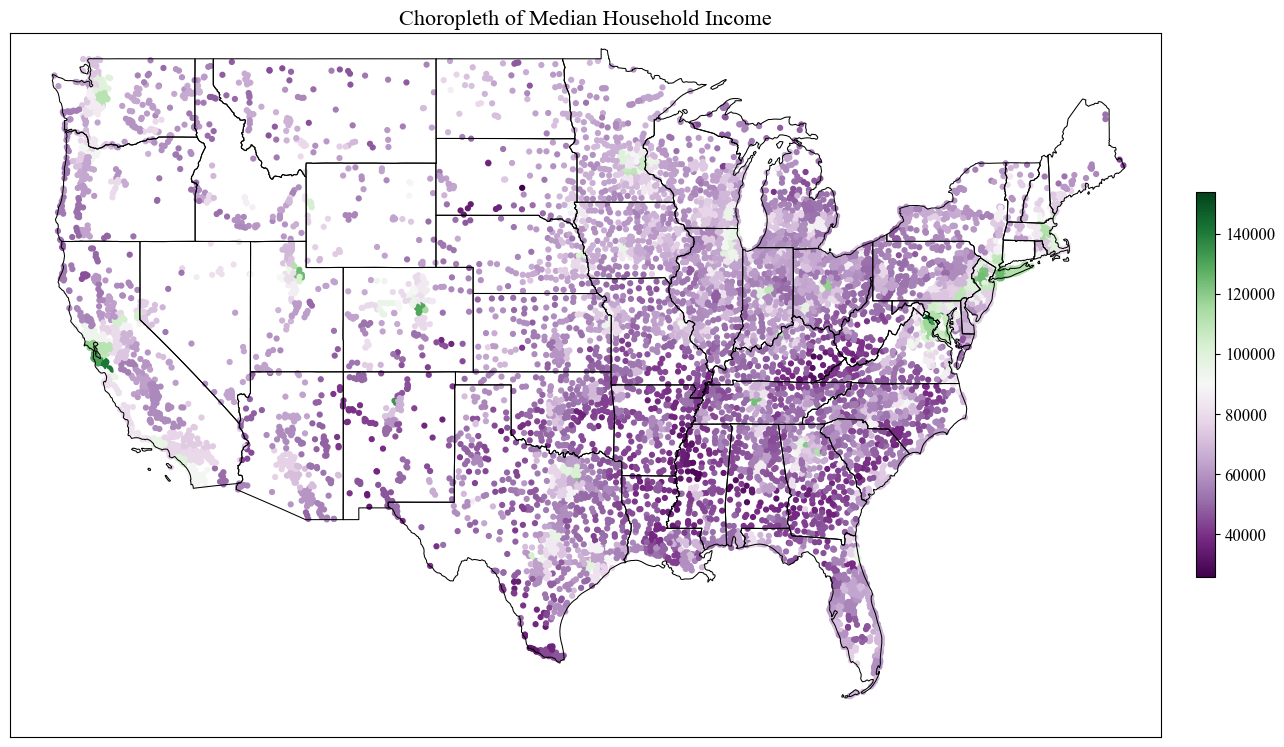

In [18]:
plt.figure(figsize = (18,10))
plt.ylim((23,50))
plt.xlim((-127,-65))
cmap = sns.color_palette('PRGn', as_cmap = True)
plt.scatter(df_all['longitude'], df_all['latitude'], c = df_all['medianHouseholdIncome'], cmap = cmap, s = 12)
us_states.boundary.plot(ax=plt.gca(), linewidth = 0.75, color = 'black')
cbar = plt.colorbar(shrink = 0.5, pad = 0.025)
cbar.ax.tick_params(labelsize = 12)
plt.title('Choropleth of Median Household Income', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel('')
plt.ylabel('')

plt.savefig('Plots/choro_household_inc.png', bbox_inches='tight', dpi = 600)

plt.show()